# <font color=#fdb930>Case Técnico Elo7 l Analista de Dados</font>

## Conteúdo

[1. Informações](#1.-Informações)

[2. Bibliotecas](#2.-Bibliotecas)

[3. Dados](#3.-Dados)

* [3.1 Análise exploratória](#3.1-Análise-exploratória)
* [3.2 Preparação dos dados](#3.2-Preparação-dos-dados)

[4. RFM](#4.-RFM)

* [4.1 Recência](#4.1-Recência)
* [4.2 Frequência](#4.2-Frequência)
* [4.3 Monetário](#4.3-Monetário)
* [4.4 Pontuação](#4.4-Pontuação)

[5. Análise](#5.-Análise)

* [5.1 Compradores](#5.1-Compradores)
* [5.2 Categorias](#5.2-Categorias)
* [5.3 Cohort](#5.3-Cohort)
    * [5.3.1 Cohort Score 2](#5.3.1-Cohort-Score-2)
* [5.4 Insights](#5.4-Insights)


## 1. Informações
[Retorna para Conteúdo](#Conteúdo)


Temos milhares de lojistas e de produtos cadastrados. Um dos desafios do marketing é
entender o comportamento dos clientes, criar segmentações e personas para ações de
marketing.

Dados importantes para a construção do case: 
[link](https://drive.google.com/file/d/19HF1ETQDDB5makDjHcu-euGttKKK8nlS/view)

Descrição dos dados:

| Variável | Descrição |
|:---|:---|
| order_id | identificador do pedido | 
| product_id | identificador do produto/item do pedido | 
| buyer_id | identificador do cliente | 
| order_date | data do pedido | 
| category | categoria do produto | 
| subactegory | subcategoria do produto | 
| quantidade | quantidade de itens | 
| preco | preço do produto/item | 

O time de marketing tem uma grande base de vendas e precisa:

1. Criar de 5 a 8 grupos de clientes para ações de marketing. Explore os dados e crie um modelo para clusterizar/agrupar os clientes. Explique quais os critérios você usou para a segmentação de cada grupo e sugira um tipo de ação de marketing para cada grupo justificando sua decisão.

2. Na sua opinião qual é o melhor grupo? E por quê?
3. Com base nos dados, existe um perfil de cliente que representa a empresa?
4. Compreenda se existe alguma correlação entre as categoria/sub da primeira compra do cliente versus categoria/sub das demais compras, queremos entender a jornada de compra do cliente.
5. Imagine que a empresa está discutindo a possibilidade de focar em categorias de produtos específicas nos próximos períodos, qual seria sua recomendação?
6. Feita as análises das questões anteriores construa uma apresentação com um bom storytelling dos resultados e insights descobertos com início, meio e conclusão. Seu público será o time de marketing e diretoria.

## 2. Bibliotecas
[Retorna para Conteúdo](#Conteúdo)

In [1]:
import pandas as pd # dataframe
import numpy as np # list
import seaborn as sns # graph
from matplotlib import pyplot as plt # plot
import matplotlib.colors as mcolors
import datetime
from sklearn.cluster import KMeans
from operator import attrgetter

import random
seed_value = 18

# 1. Python
random.seed(seed_value)

# 2. Numpy
np.random.seed(seed_value)

## 3. Dados
[Retorna para Conteúdo](#Conteúdo)

In [2]:
# upload
df = pd.read_csv("/home/pathilink/Documentos/test/elo7/elo7_mkt_case/data/case_elo7.csv", delimiter=';')

df.sample(5)

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
85142,16060FF,6340C7,9DA3DD,13/08/2019,lembrancinhas,latinhas-personalizadas,20,"0,6"
65579,11FA775,D54926,787740,19/12/2018,casa,caneca,1,"29,9"
10809,A51D8B,938ECC,86698,28/04/2017,decoracao,decoracao-eco,2,"9,9"
16783,B1F68F,7B5874,5FB3DC,30/06/2017,casamento,porta-aliancas,1,"69,9"
22701,BF9F42,4E1ABE,26BF73,06/09/2017,aniversario-e-festas,marmitinhas-personalizadas,40,"0,79"


## 3.1 Análise exploratória
[Retorna para Conteúdo](#Conteúdo)

In [3]:
print('The data has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The data has 99644 rows and 8 columns.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99644 entries, 0 to 99643
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     99644 non-null  object
 1   product_id   99644 non-null  object
 2   buyer_id     99644 non-null  object
 3   order_date   99644 non-null  object
 4   category     99644 non-null  object
 5   subcategory  99644 non-null  object
 6   quantidade   99644 non-null  int64 
 7   preco        99644 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


In [5]:
# dados faltantes
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentual'])
missing_data#.query('Total > 0')

,Total,Percentual
preco,0,0.0
quantidade,0,0.0
subcategory,0,0.0
category,0,0.0
order_date,0,0.0
buyer_id,0,0.0
product_id,0,0.0
order_id,0,0.0


In [6]:
# valores únicos por coluna
col_list = []
nunique_list = []

for col in df:
  col_list.append(col)
  nunique_list.append(df[col].nunique())

# list(zip(col_list, nunique_list))
df_nunique = pd.DataFrame(
    {'column': col_list,
     'nunique': nunique_list
     }
)

df_nunique

,column,nunique
0,order_id,86986
1,product_id,81200
2,buyer_id,39287
3,order_date,1095
4,category,42
5,subcategory,758
6,quantidade,215
7,preco,4893


In [7]:
sorted(df['category'].unique())

['[NULL]',
 'acessorios',
 'aniversario-e-festas',
 'armarinho',
 'aulas-e-cursos',
 'bebe',
 'bijuterias',
 'bijuterias-e-acessorios',
 'biscuit-e-modelagem',
 'bolsas-e-carteiras',
 'bordado',
 'casa',
 'casamento',
 'ceramica',
 'convites',
 'decoracao',
 'doces',
 'eco',
 'embalagens-diversas',
 'eva',
 'feltragem',
 'festas',
 'infantil',
 'jogos-e-brinquedos',
 'joias',
 'lembrancinhas',
 'macrame',
 'mdf-e-madeira',
 'mosaico',
 'papel-e-cia',
 'papel-e-scrapbooking',
 'patchwork-e-costura',
 'pets',
 'pintura-artistica',
 'pintura-em-tecido',
 'religiosos',
 'roupas',
 'saboaria',
 'saude-e-beleza',
 'tecnicas-de-artesanato',
 'trico-e-croche',
 'velas']

In [8]:
df.query('category == "[NULL]"')

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
15,8DE8DD,36A79A,52B405,01/01/2017,[NULL],[NULL],1,35
6079,9AC31B,361291,5494E,09/03/2017,[NULL],[NULL],1,80
14907,ADF790,37BA44,57149D,09/06/2017,[NULL],[NULL],1,100
47419,F66245,31D6B9,78314D,14/06/2018,[NULL],[NULL],20,"1,5"
78106,148D993,3789D6,8D5B25,20/05/2019,[NULL],[NULL],1,73


In [9]:
df.query('subcategory == "[NULL]"')

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
15,8DE8DD,36A79A,52B405,01/01/2017,[NULL],[NULL],1,35
31,8E0C71,65E6E4,D4991,02/01/2017,trico-e-croche,[NULL],1,"12,9"
32,8E0C71,6BEB4B,D4991,02/01/2017,trico-e-croche,[NULL],1,"10,9"
33,8E0C71,7E13CA,D4991,02/01/2017,trico-e-croche,[NULL],1,"12,9"
34,8E0C71,850FD0,D4991,02/01/2017,trico-e-croche,[NULL],1,"13,9"
...,...,...,...,...,...,...,...,...
99353,18E0B6C,C99A18,88B428,26/12/2019,decoracao,[NULL],1,350
99380,18DEE1F,E8F1CA,AC4BE1,26/12/2019,roupas,[NULL],1,"39,99"
99456,18E341A,9F3816,AC62DE,27/12/2019,joias,[NULL],1,300
99487,18E5D46,110FFB6,5B00E3,28/12/2019,acessorios,[NULL],1,22


In [10]:
sorted(df['subcategory'].unique())

['[NULL]',
 'abafador',
 'abajur',
 'abajur-infantil',
 'abridor-de-casa',
 'acessorios-para-noiva',
 'adesivo',
 'adesivo-para-notebook',
 'adesivo-transparente',
 'adesivos-de-geladeira',
 'adesivos-de-parede',
 'agenda',
 'agulha',
 'album',
 'album-do-bebe',
 'alca-para-bolsa',
 'alfinete',
 'alfineteiro',
 'aliancas',
 'aliancas-de-compromisso',
 'aliancas-de-noivado',
 'aliancas-de-ouro',
 'aliancas-de-prata',
 'alicate',
 'almofada',
 'almofada-de-amamentacao',
 'almofada-para-notebook',
 'almofadas-personalizadas',
 'amigurumi',
 'amuletos',
 'anel',
 'anel-de-falange',
 'anel-de-formatura',
 'anel-de-ouro',
 'anel-de-prata',
 'anjo',
 'aparador-de-livros',
 'aplique',
 'aplique-e-recortes',
 'apostila',
 'aquarela',
 'arame',
 'argila',
 'aromatizador',
 'arranjo-para-noiva',
 'arranjos-de-flores',
 'arte-digital',
 'arte-em-ferro',
 'arte-em-vidro',
 'arte-francesa',
 'artesanato-em-tecido',
 'arvore-de-assinaturas',
 'arvore-de-jujuba',
 'arvore-genealogica',
 'avental',
 'a

In [11]:
df[['category', 'subcategory']].query('subcategory == "molde" | subcategory == "moldes"').drop_duplicates()

,category,subcategory
825,biscuit-e-modelagem,molde
2346,saboaria,moldes
19248,saboaria,molde
53900,pintura-em-tecido,molde
54999,velas,molde
61398,bordado,molde
82939,ceramica,molde


In [12]:
df[['category', 'subcategory']].query('subcategory == "tag" | subcategory == "tags"').drop_duplicates()

,category,subcategory
343,papel-e-cia,tag
52067,festas,tags


In [13]:
df[['category', 'subcategory']].query('subcategory == "topper" | subcategory == "toppers"').drop_duplicates()

,category,subcategory
99,aniversario-e-festas,topper
30675,casa,topper
53618,festas,toppers


In [14]:
df[['category', 'subcategory']].query('subcategory == "tubete" | subcategory == "tubetes"').drop_duplicates()

,category,subcategory
1621,embalagens-diversas,tubete
6137,festas,tubetes


In [15]:
def plot_percentage(var, data):
    plt.figure(figsize=(20, 6))
    
    ax = sns.countplot(x=var, data=data, orient='h', palette='hot', order=data[var].value_counts().index)
    plt.xticks(rotation=90)
    ax.set_ylabel('Count', fontsize=10)
    ax.set_title(var, fontsize=15)
    sizes = []
    
    for p in ax.patches:
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x() + p.get_width()/1.6, 
                height + 6,
               '{:1.2f}%'.format(height/len(data)*100),
               ha = 'center', va = 'bottom',
               fontsize=12)
        
    ax.set_ylim(0, max(sizes)*1.1) # dist entre a maior barra e o limite do eixo y

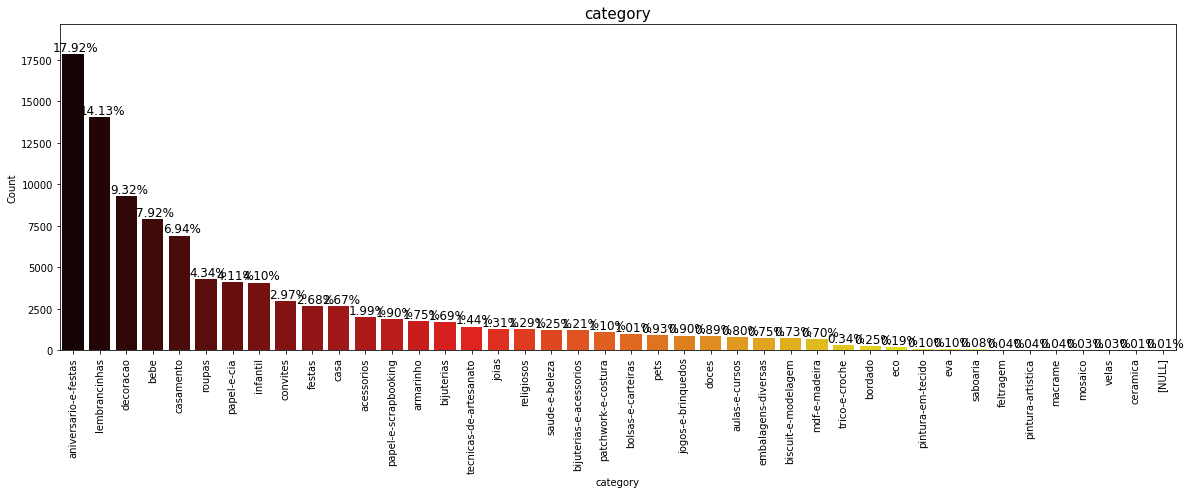

In [16]:
# percentual de cada categoria
plot_percentage('category', df)

## 3.2 Preparação dos dados
[Retorna para Conteúdo](#Conteúdo)

In [17]:
# copy data
df_prep = df.copy()

In [18]:
# formato 'yyyy-mm-dd'
df_prep['order_date'] = pd.to_datetime(df_prep['order_date'], format='%d/%m/%Y')

In [19]:
# strig --> float
df_prep['preco'] = df_prep['preco'].apply(lambda x: float(str(x).replace(',', '.')))

In [20]:
# drop '[NULL]'
df_prep = df_prep.query('category != "[NULL]"')

In [21]:
# substituir valores na coluna 'subcategory'
df_prep.loc[:, 'subcategory'] = df_prep.loc[:,'subcategory'].replace({
    'moldes': 'molde',
    'toppers': 'topper',
    'tubetes': 'tubete', 
    'tags': 'tag'
})


In [22]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99639 entries, 0 to 99643
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     99639 non-null  object        
 1   product_id   99639 non-null  object        
 2   buyer_id     99639 non-null  object        
 3   order_date   99639 non-null  datetime64[ns]
 4   category     99639 non-null  object        
 5   subcategory  99639 non-null  object        
 6   quantidade   99639 non-null  int64         
 7   preco        99639 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 6.8+ MB


In [23]:
df_prep.head()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco
0,8DE8B7,822945,55498,2017-01-01,papel-e-cia,etiquetas-personalizadas,1,36.0
1,8DE8E2,8527FA,59E00,2017-01-01,decoracao,adesivos-de-parede,1,45.9
2,8DE5BF,7805CB,CEBB5,2017-01-01,lembrancinhas,brinde-corporativo,7,3.5
3,8DE7A8,796DE2,E3E11,2017-01-01,bijuterias,colar,1,35.0
4,8DE2F9,7041AF,FFD39,2017-01-01,papel-e-cia,risque-e-rabisque,1,12.0


## 4. RFM
[Retorna para Conteúdo](#Conteúdo)

**Recência** - há quantos dias desde a última compra?

**Frequência** - quantas compras o cliente realizou?

**Monetário** - quanto o cliente já gastou?

In [24]:
# data mínima do período
df_prep['order_date'].min()

Timestamp('2017-01-01 00:00:00')

In [25]:
# definindo data máxima para análise
latest_date = df_prep['order_date'].max()
latest_date

Timestamp('2019-12-31 00:00:00')

## 4.1 Recência
[Retorna para Conteúdo](#Conteúdo)

In [26]:
# data do último pedido do cliente
df_buy = df_prep.groupby('buyer_id').order_date.max().reset_index()

# renomeia
df_buy.columns = ['buyer_id', 'order_date_max']

# cálculo da recência em dias
df_buy['recency'] = (latest_date - df_buy['order_date_max']).dt.days

df_buy.head()

,buyer_id,order_date_max,recency
0,10012C,2017-07-17,897
1,10044F,2017-06-05,939
2,1007D2,2018-06-03,576
3,1008C4,2018-08-08,510
4,100933,2019-11-14,47


In [27]:
df_buyer = pd.merge(df_prep, df_buy[['buyer_id', 'recency']], on='buyer_id')
df_buyer.head()

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco,recency
0,8DE8B7,822945,55498,2017-01-01,papel-e-cia,etiquetas-personalizadas,1,36.0,589
1,F20947,A8A627,55498,2018-05-21,bijuterias,outra-sub-categoria,1,10.0,589
2,F20ED6,A59ED9,55498,2018-05-21,aniversario-e-festas,forminhas-para-doces,1,29.9,589
3,8DE8E2,8527FA,59E00,2017-01-01,decoracao,adesivos-de-parede,1,45.9,151
4,15D0CAD,B24F3C,59E00,2019-08-02,jogos-e-brinquedos,bebe-reborn,1,579.0,151


In [28]:
def calculate_wcss(df):
    wcss = []
    for k in range(1, 9):                 # n clusters tested
        kmeans = KMeans(n_clusters=k)  
        kmeans.fit(X=df.copy())           # Make a copy of the DataFrame
        df['clusters'] = kmeans.labels_   # new column defining cluster
        wcss.append(kmeans.inertia_)      # inertia value
    return wcss


In [29]:
df_recency = df_buyer[['recency']].copy()

wcss_values = calculate_wcss(df_recency)

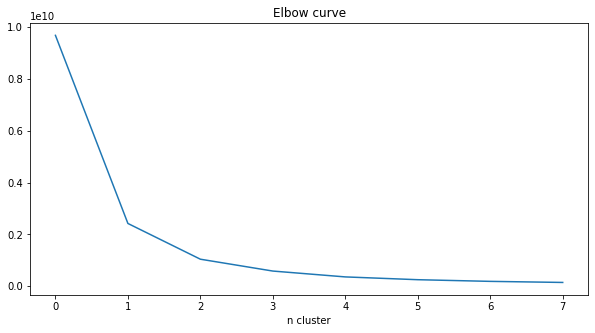

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(wcss_values)
plt.title('Elbow curve', fontsize=12)
plt.xlabel('n cluster')
plt.show()

In [31]:
# copy dataset
# df_clusters = df_buyer[['order_id', 'buyer_id', 'quantidade', 'preco', 'recency']].copy()
df_clusters = df_buyer.copy()

In [32]:
# criar coluna recency_cluster
kmeans = KMeans(n_clusters=3, random_state=seed_value)

df_clusters['recency_cluster'] = kmeans.fit_predict(df_recency)
df_clusters.sample(5)

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco,recency,recency_cluster
8418,9888FF,79A74A,55453B,2017-02-26,aniversario-e-festas,enfeites-de-mesa,1,360.0,1022,2
86745,150B428,ED0021,7FAD93,2019-06-17,lembrancinhas,brinde-corporativo,12,23.9,197,1
71763,17A61F4,16D5FA,83E2A2,2019-10-29,infantil,camiseta-infantil,1,45.0,63,1
3903,928C81,85A535,5490C5,2017-01-26,decoracao,decoracao-eco,1,129.9,277,1
61957,FF14C9,858432,7BFBC8,2018-07-31,biscuit-e-modelagem,molde,1,20.0,477,0


In [33]:
# função de clusterização

def order_cluster(cluster_name, target_name, df, order):
    # agrupar por média
    grouping_by_cluster = df.groupby(cluster_name)[target_name].mean().reset_index()
    
    # ordenar pelo cluster
    grouping_by_cluster_ordered = grouping_by_cluster.sort_values(by=target_name, ascending=order).reset_index(drop=True)
    
    # criar cluster ordenado
    grouping_by_cluster_ordered['index'] = grouping_by_cluster_ordered.index
    
    # adicionar coluna de cluster ao dataset
    joining_clusters = pd.merge(df, grouping_by_cluster_ordered[[cluster_name, 'index']], on=cluster_name)
    
    # deletar cluster  não ordenado
    remove_column = joining_clusters.drop(cluster_name, axis=1)
    
    # renomear coluna
    data_rfm = remove_column.rename(columns={'index':cluster_name})
    
    return data_rfm

In [34]:
# aplicar função
df_clusters = order_cluster('recency_cluster', 'recency', df_clusters, False)

# média com a maior recência recebe pontuação 0, com a menor recência recebe 2
df_clusters.groupby('recency_cluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,27224.0,864.172495,120.566725,669.0,763.0,859.0,965.0,1094.0
1,32368.0,473.494099,102.729335,305.0,390.0,464.0,558.0,668.0
2,40047.0,135.800385,87.555205,0.0,57.0,122.0,212.0,304.0


## 4.2 Frequência
[Retorna para Conteúdo](#Conteúdo)

In [35]:
df_frequency = df_buyer[['buyer_id', 'order_id']].copy()

# count all orders
df_frequency['frequency'] = df_frequency.groupby('buyer_id')['order_id'].transform('count')
df_frequency = df_frequency.drop(['order_id'], axis=1).drop_duplicates()

df_frequency.head()

,buyer_id,frequency
0,55498,3
3,59E00,2
5,CEBB5,2
7,E3E11,4
11,FFD39,1


In [36]:
# merge 
df_clusters = pd.merge(df_clusters, df_frequency, on='buyer_id')

# filtra coluna
df_frequency = df_clusters[['frequency']]

In [37]:
# cria coluna frequency_cluster 
kmeans = KMeans(n_clusters=3, random_state=seed_value)
df_clusters['frequency_cluster'] = kmeans.fit_predict(df_frequency)

In [38]:
# aplicar função
df_clusters = order_cluster('frequency_cluster', 'frequency', df_clusters, True)

# média com a menor frequency recebe pontuação 0, com a maior frequency recebe 2
df_clusters.groupby('frequency_cluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequency_cluster,,,,,,,,
0,95516.0,3.648206,2.386194,1.0,2.0,3.0,5.0,14.0
1,3602.0,25.921155,11.631284,15.0,17.0,22.0,30.0,68.0
2,521.0,134.927063,22.806090,92.0,125.0,152.0,152.0,152.0


## 4.3 Monetário
[Retorna para Conteúdo](#Conteúdo)

In [39]:
df_monetary = df_buyer[['buyer_id', 'quantidade', 'preco']].copy()

# calculate total
df_monetary['total_value'] = df_monetary['quantidade'] * df_monetary['preco']

# sum all orders
df_monetary['monetary'] = df_monetary.groupby('buyer_id')['total_value'].transform('sum')
df_monetary = df_monetary.drop(['quantidade', 'preco', 'total_value'], axis=1).drop_duplicates()

df_monetary.head()

,buyer_id,monetary
0,55498,75.9
3,59E00,624.9
5,CEBB5,83.4
7,E3E11,158.0
11,FFD39,12.0


In [40]:
# merge 
df_clusters = pd.merge(df_clusters, df_monetary, on='buyer_id')

# filtra coluna
df_monetary = df_clusters[['monetary']]

In [41]:
# cria coluna monetary_cluster 
kmeans = KMeans(n_clusters=3, random_state=seed_value)
df_clusters['monetary_cluster'] = kmeans.fit_predict(df_monetary)

In [42]:
# aplicar função
df_clusters = order_cluster('monetary_cluster', 'monetary', df_clusters, True)

# média com a menor monetary recebe pontuação 0, com a maior monetary recebe 2
df_clusters.groupby('monetary_cluster')['monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
monetary_cluster,,,,,,,,
0,79189.0,165.946955,111.293267,0.01,72.4,144.78,244.30,426.8
1,19010.0,689.275862,239.817683,426.85,504.9,615.75,800.00,1476.0
2,1440.0,2279.008299,1208.573022,1484.80,1630.9,1880.75,2288.99,11690.0


## 4.4 Pontuação
[Retorna para Conteúdo](#Conteúdo)

In [43]:
# filtra cols
df_score = df_clusters[['buyer_id','recency','recency_cluster','frequency','frequency_cluster','monetary','monetary_cluster']].drop_duplicates()

# calcular score
df_score['score'] = df_score['recency_cluster'] + df_score['frequency_cluster'] + df_score['monetary_cluster']

# filtra cols
df_score = df_score[['buyer_id', 'score']]

df_score.sample(5)

,buyer_id,score
73849,2EB424,0
20705,851D14,1
95733,65CE71,1
91284,2858AF,3
73854,3BAC6F,0


In [44]:
# total de buyers por score
df_score.groupby('score').count()

,buyer_id
score,
0,9909
1,11992
2,15344
3,1890
4,147
5,4


In [45]:
# df para análise
df_analysis =  pd.merge(df_clusters, df_score, on='buyer_id')
df_analysis.sample(3)

,order_id,product_id,buyer_id,order_date,category,subcategory,quantidade,preco,recency,recency_cluster,frequency,frequency_cluster,monetary,monetary_cluster,score
36454,14EE415,B35573,873882,2019-06-10,lembrancinhas,brinde-corporativo,1,7.0,204,2,3,0,11.0,0,2
26840,1456F91,E0D75C,59FDA4,2019-05-08,patchwork-e-costura,tecido,1,2.5,237,2,10,0,228.4,0,2
45627,15875F9,79158F,9AF2A1,2019-07-17,religiosos,santo,1,58.0,29,2,2,0,172.9,0,2


## 5. Análise
[Retorna para Conteúdo](#Conteúdo)

## 5.1 Compradores
[Retorna para Conteúdo](#Conteúdo)

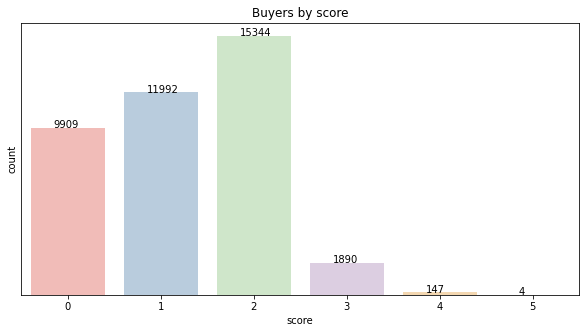

In [46]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_score, x="score", palette='Pastel1')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
# remover ticks e valores do eixo y
ax.set_title('Buyers by score', fontsize=12)
ax.set_yticks([])
ax.set_yticklabels([])

plt.show()

In [47]:
def plot_score(x, y, df):
    sns.set(palette='Wistia', color_codes=True, style='white')
    plt.figure(figsize=[10, 5])
    sns.scatterplot(x=x, y=y, hue='score', data=df, size='score', sizes=(50, 200), size_order=[5, 4, 3, 2, 1, 0])
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.title(f'{x} x {y}', fontsize=12)
    plt.show()

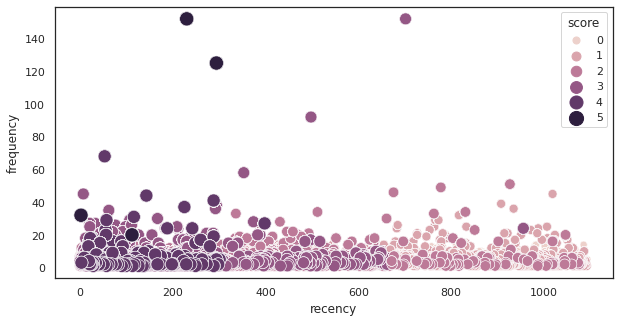

In [48]:
plot_score('recency', 'frequency', df_analysis)

💡 Os compradores mais ativos (recency < 200) possuem scores 3 e 4 e possuem por volta de até 40 pedidos.

In [49]:
# buyers que possuíam grande frequência mas que deixaram de comprar - pq?
df_analysis.query('recency > 200 & frequency > 120')[['buyer_id', 'score', 'category']].drop_duplicates()

,buyer_id,score,category
97770,403EC9,5,acessorios
97867,403EC9,5,lembrancinhas
97870,403EC9,5,aniversario-e-festas
97895,94AD50,5,saude-e-beleza
98047,275AE5,3,tecnicas-de-artesanato


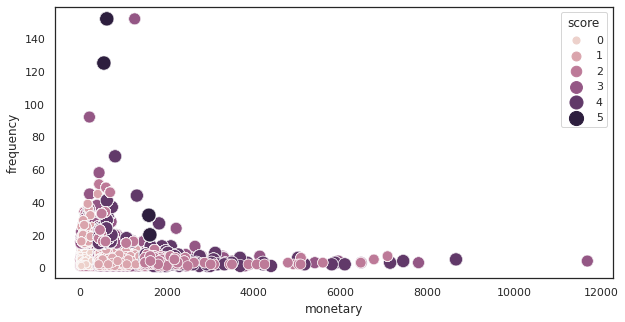

In [50]:
plot_score('monetary', 'frequency', df_analysis)

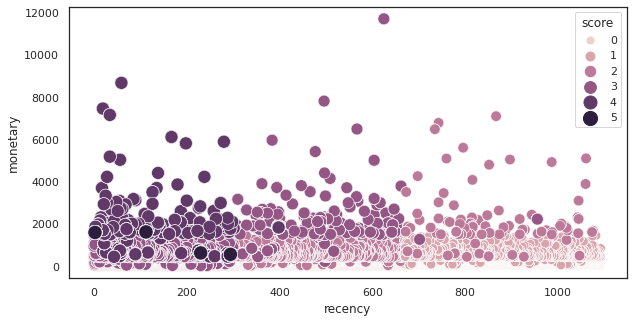

In [51]:
plot_score('recency', 'monetary', df_analysis)

## 5.2 Categorias
[Retorna para Conteúdo](#Conteúdo)

In [52]:
# Contagem de 'category' agrupado por 'score'
count_per_score = df_analysis.groupby(['score', 'category']).size().reset_index(name='count_category')

# Ordenar por 'count_category' em ordem decrescente
count_per_score = count_per_score.sort_values(by=['score', 'count_category'], ascending=[True, False])

# Obter apenas os 5 primeiros de cada score
top_5_per_score = count_per_score.groupby('score').head(5)

# Exibir apenas os 5 primeiros de cada score
top_5_per_score

,score,category,count_category
1,0,aniversario-e-festas,4021
24,0,lembrancinhas,2977
14,0,decoracao,2186
4,0,bebe,1775
11,0,casamento,1454
40,1,aniversario-e-festas,5433
63,1,lembrancinhas,4314
53,1,decoracao,2610
43,1,bebe,2345
50,1,casamento,2223


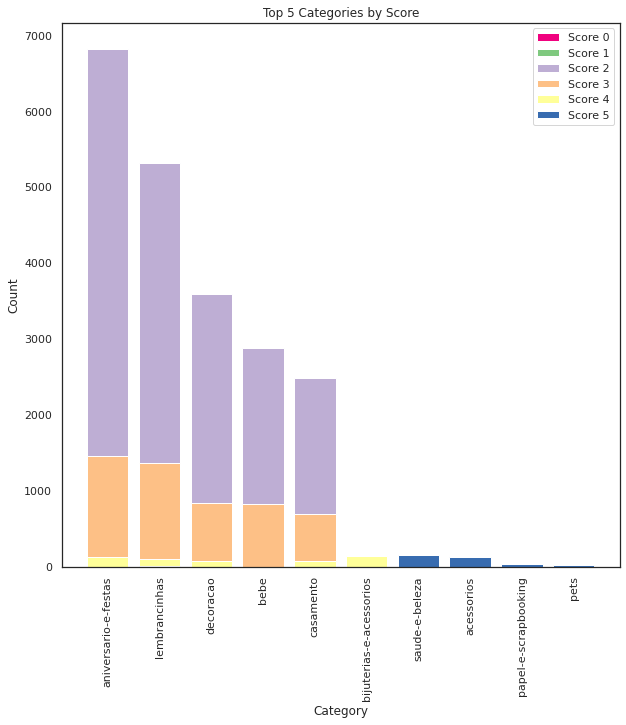

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))

# definir paleta 
palette = sns.color_palette("Accent", n_colors=len(top_5_per_score['score'].unique()))

# iterar sobre cada grupo de 'score'
for name, group in top_5_per_score.groupby('score'):
    # adicionar barras empilhadas para cada 'score' com cores da paleta
    ax.bar(group['category'], group['count_category'], label=f'Score {name}', color=palette[name-1])  # Ajuste para começar do 0

# rótulos e título
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Top 5 Categories by Score')
ax.legend()

plt.xticks(rotation=90)

# ajustar a granularidade do eixo y para incrementos de 500
# plt.yticks(range(0, max(top_5_per_score['count_category']) + 1, 500))

# exibir 
plt.show()


In [54]:
# identificar a primeira compra de cada cliente
first_purchase = df_analysis.groupby('buyer_id')['order_date'].min().reset_index(name='first_order_date')

# merge dataframe original com primeira compra
df_with_first_purchase = pd.merge(df_analysis, first_purchase, on='buyer_id')

# coluna tag primeira compra
df_with_first_purchase['is_first_purchase'] = (df_with_first_purchase['order_date'] == df_with_first_purchase['first_order_date'])

# filtrar apenas as linhas referentes às demais compras (não primeira compra)
subsequent_purchases = df_with_first_purchase[df_with_first_purchase['is_first_purchase'] == False]

# calcular a correlação entre as categorias da primeira compra e as demais compras
subsequent_purchases_mode = subsequent_purchases.groupby('buyer_id')[['category']].agg(lambda x: x.mode().iat[0]).reset_index()

# Exibir a matriz de correlação
# subsequent_purchases_mode


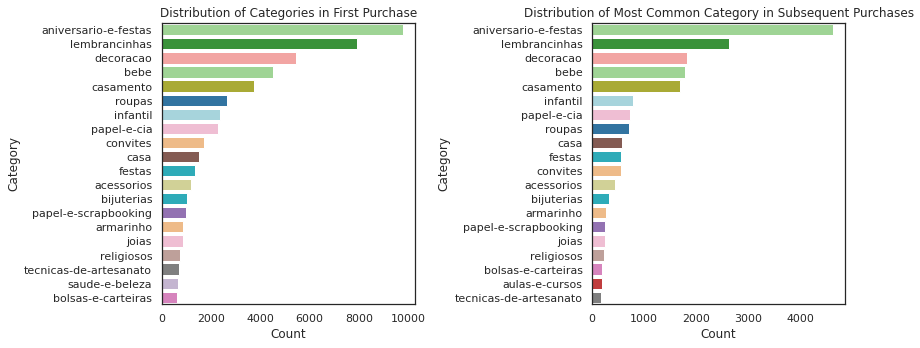

In [55]:
# figura com subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Obter todas as categorias únicas presentes em ambos os gráficos
all_categories = set(df_with_first_purchase['category']).union(set(subsequent_purchases_mode['category']))

# Criar uma paleta personalizada mapeando cada categoria para uma cor específica
category_palette = {category: sns.color_palette("tab20")[i % len(sns.color_palette("tab20"))] for i, category in enumerate(all_categories)}


# distribuição das categorias na primeira compra
order_first_purchase = df_with_first_purchase[df_with_first_purchase['is_first_purchase']]['category'].value_counts().index
sns.countplot(y='category', data=df_with_first_purchase[df_with_first_purchase['is_first_purchase']], ax=axes[0], order=order_first_purchase[:20], palette=category_palette)
axes[0].set_title('Distribution of Categories in First Purchase')
axes[0].set_ylabel('Category')
axes[0].set_xlabel('Count')

# distribuição da categoria mais comum nas compras subsequentes
order_most_common = subsequent_purchases_mode['category'].value_counts().index
sns.countplot(y='category', data=subsequent_purchases_mode, ax=axes[1], order=order_most_common[:20], palette=category_palette)  # limitar a 20 linhas
axes[1].set_title('Distribution of Most Common Category in Subsequent Purchases')
axes[1].set_ylabel('Category')
axes[1].set_xlabel('Count')

# ajustar o layout
plt.tight_layout()

# exibir 
plt.show()


## 5.3 Cohort
[Retorna para Conteúdo](#Conteúdo)

In [56]:
df_cohort = df_analysis.copy()

In [57]:
# cohort mensal
df_cohort['order_month'] = df_cohort['order_date'].dt.to_period('M')

In [58]:
# primeira compra
df_cohort['cohort'] = df_cohort.groupby('buyer_id')['order_date'].transform('min').dt.to_period('M')

In [59]:
df_cohort_ = df_cohort.groupby(['cohort', 'order_month']).agg(n_customers=('buyer_id', 'nunique')).reset_index(drop=False)

In [60]:
df_cohort_['period_number'] = (df_cohort_.order_month - df_cohort_.cohort).apply(attrgetter('n'))

In [61]:
df_cohort_.head()

,cohort,order_month,n_customers,period_number
0,2017-01,2017-01,1512,0
1,2017-01,2017-02,171,1
2,2017-01,2017-03,82,2
3,2017-01,2017-04,68,3
4,2017-01,2017-05,53,4


In [62]:
cohort_pivot = df_cohort_.pivot_table(index='cohort', columns='period_number', values='n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
cohort,,,,,,,,,,,,,,,,,,,,,
2017-01,1512.0,171.0,82.0,68.0,53.0,51.0,49.0,39.0,34.0,39.0,...,26.0,24.0,18.0,20.0,24.0,21.0,23.0,26.0,25.0,23.0
2017-02,1247.0,180.0,79.0,72.0,44.0,38.0,32.0,34.0,32.0,36.0,...,24.0,19.0,11.0,22.0,16.0,17.0,20.0,26.0,21.0,NaN
2017-03,1445.0,184.0,104.0,67.0,67.0,46.0,33.0,32.0,43.0,25.0,...,26.0,18.0,17.0,19.0,19.0,28.0,36.0,13.0,NaN,NaN
2017-04,1184.0,167.0,83.0,55.0,49.0,45.0,38.0,28.0,15.0,26.0,...,20.0,17.0,18.0,13.0,29.0,16.0,15.0,NaN,NaN,NaN
2017-05,1411.0,178.0,91.0,67.0,45.0,54.0,51.0,26.0,50.0,41.0,...,15.0,17.0,18.0,30.0,25.0,16.0,NaN,NaN,NaN,NaN
2017-06,1171.0,146.0,67.0,47.0,36.0,39.0,25.0,29.0,33.0,34.0,...,16.0,24.0,23.0,24.0,22.0,NaN,NaN,NaN,NaN,NaN
2017-07,1233.0,150.0,85.0,59.0,51.0,24.0,39.0,31.0,16.0,21.0,...,20.0,29.0,20.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1127.0,135.0,85.0,44.0,30.0,32.0,25.0,25.0,23.0,25.0,...,27.0,31.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1127.0,136.0,57.0,31.0,36.0,41.0,34.0,28.0,24.0,30.0,...,20.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# cohort_size
cohort_size = cohort_pivot.iloc[:, 0]

In [64]:
# retention_matrix
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

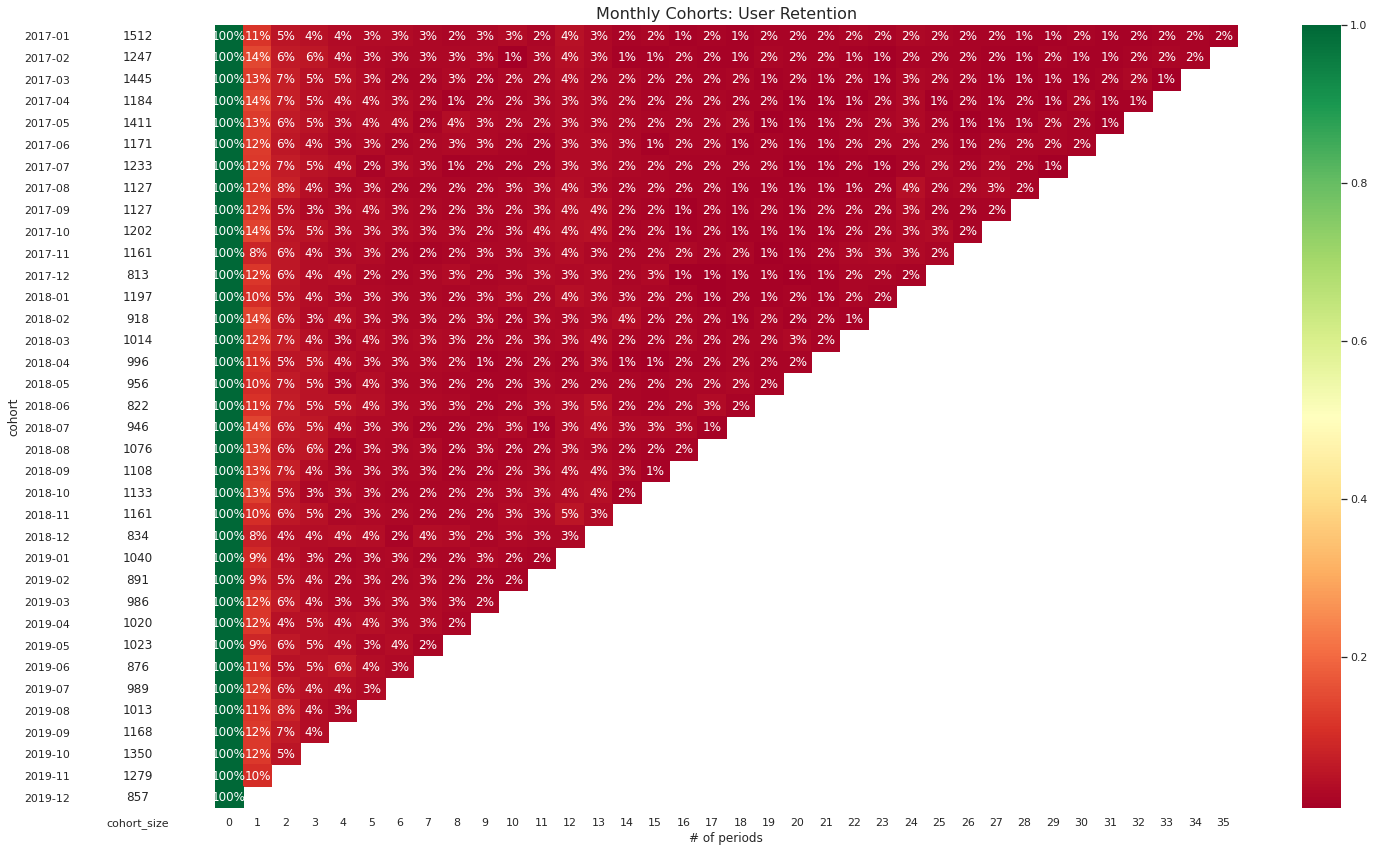

In [65]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(21, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


In [66]:
retention_matrix.head()

period_number,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
cohort,,,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.113095,0.054233,0.044974,0.035053,0.033730,0.032407,0.025794,0.022487,0.025794,...,0.017196,0.015873,0.011905,0.013228,0.015873,0.013889,0.015212,0.017196,0.016534,0.015212
2017-02,1.0,0.144346,0.063352,0.057739,0.035285,0.030473,0.025662,0.027265,0.025662,0.028869,...,0.019246,0.015237,0.008821,0.017642,0.012831,0.013633,0.016038,0.020850,0.016840,NaN
2017-03,1.0,0.127336,0.071972,0.046367,0.046367,0.031834,0.022837,0.022145,0.029758,0.017301,...,0.017993,0.012457,0.011765,0.013149,0.013149,0.019377,0.024913,0.008997,NaN,NaN
2017-04,1.0,0.141047,0.070101,0.046453,0.041385,0.038007,0.032095,0.023649,0.012669,0.021959,...,0.016892,0.014358,0.015203,0.010980,0.024493,0.013514,0.012669,NaN,NaN,NaN
2017-05,1.0,0.126152,0.064493,0.047484,0.031892,0.038271,0.036145,0.018427,0.035436,0.029057,...,0.010631,0.012048,0.012757,0.021262,0.017718,0.011339,NaN,NaN,NaN,NaN


In [72]:
# estatísticas do período 1
retention_matrix[1].mean()

0.11621847922482809

In [73]:
# estatísticas do período 2
retention_matrix[2].mean()

0.05889690444442614

## 5.3.1 Cohort Score 2
[Retorna para Conteúdo](#Conteúdo)

**Analisando o segmento mais representativo da base de compradores.**

In [77]:
# filtro
df_cohort_score2 = df_analysis.query('score == 2').copy()

# cohort mensal
df_cohort_score2['order_month'] = df_cohort_score2['order_date'].dt.to_period('M')

# primeira compra
df_cohort_score2['cohort'] = df_cohort_score2.groupby('buyer_id')['order_date'].transform('min').dt.to_period('M')

# agrupar por cohort e mes
df_cohort_score2_ = df_cohort_score2.groupby(['cohort', 'order_month']).agg(n_customers=('buyer_id', 'nunique')).reset_index(drop=False)

df_cohort_score2_['period_number'] = (df_cohort_score2_.order_month - df_cohort_score2_.cohort).apply(attrgetter('n'))

cohort_pivot_score2 = df_cohort_score2_.pivot_table(index='cohort', columns='period_number', values='n_customers')

# cohort_size
cohort_size_score2 = cohort_pivot_score2.iloc[:, 0]

# retention_matrix
retention_matrix_score2 = cohort_pivot_score2.divide(cohort_size_score2, axis=0)


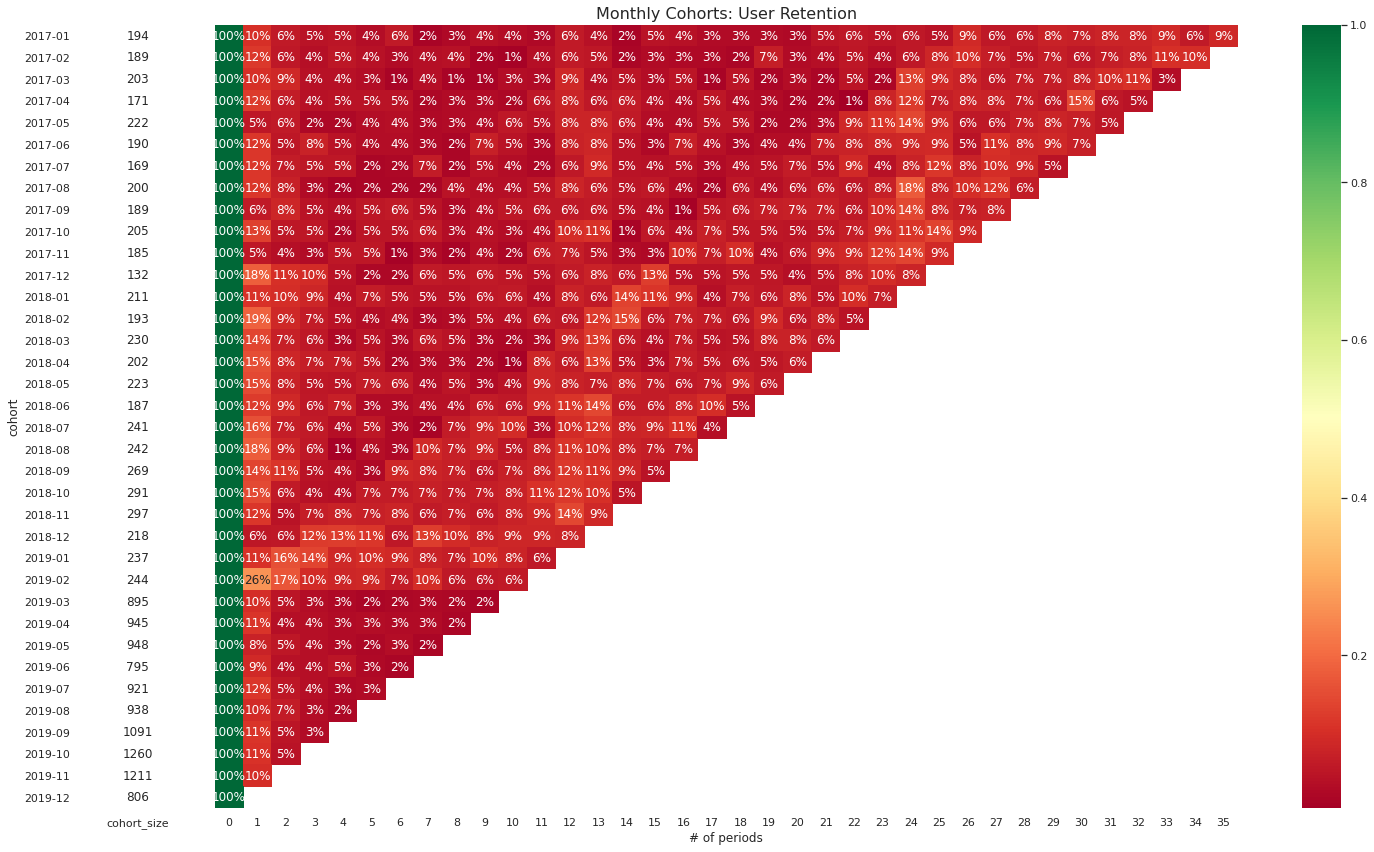

In [78]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(21, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix_score2, 
                mask=retention_matrix_score2.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_score2_df = pd.DataFrame(cohort_size_score2).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_score2_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


In [81]:
print('Média do período 1:',retention_matrix_score2[1].mean())
print('Média do período 2:',retention_matrix_score2[2].mean())

Média do período 1: 0.12110070109733476
Média do período 2: 0.0732619711425147


## 5.4 Insights
[Retorna para Conteúdo](#Conteúdo)

Através da clusterização dos clientes criou-se uma pontuação para cada fator:

* Recência
* Frequência
* Monetário

Tendo como base o período analisado (01/01/2017 a 31/12/2019), os clientes que estão a mais tempo sem comprar receberam 0 ponto e os que possuíam compras mais recentes receberam 2 pontos (**recência**). Os clientes que mais compraram (**frequência**) e os que mais gastaram (**monetário**) receberam 2 pontos, caso contrário receberam 0 pontos.


Ao final os pontos foram somados e cada cliente obteve um **score**. Formaram-se então 6 grupos distintos de clientes, com scores de 0 a 5 pontos - 0 para os clientes que performaram mal no modelo RFM e 5 caso contrário.

Dado o score de cada grupo, foi possível identificar que, em termos de volume, <span style="background-color: #fdb930; color: #000000;">o score 2 foi o perfil que mais representou a empresa </span> no período analizado. No entanto, <span style="background-color: #fdb930; color: #000000;"> o melhor grupo obteve o score 4</span>.  

Por que não escolher o score 5 como melhor grupo? 

Este grupo, além de ser muito pequeno, apresenta padrões de compra bem diferentes dos demais grupo, principalmente quando se analisa as categorias e a frequência das compras. O grupo com score 4 consome, em sua maioria, as mesmas categorias dos scores 2 e 3, mas apresenta um RFM melhor, portanto, um score maior.

Analisando os grupos com scores 2 e 3, seria interessante mover a distribuição de clientes da empresa, do score 2 para o 3. O grupo 3 comprou produtos das mesmas categorias que o grupo 2 mas apresentou menor tempo desde a última compra, maior frequência e gastou mais. Assim, uma recomendação seria <span style="background-color: #fdb930; color: #000000;"> investir maior atenção nos produtos dessas categorias ( _aniversarios-e-festas, lembrancinhas, decoração, bebê e casamento_ ) a fim de transformar os clientes score 2 em score 3</span>. 

Ao comparar a categoria da 1a compra dos clientes com a categoria mais consumida nas compras subsequentes, é possível visualizar que há mudanças na preferência por algumas categorias e na quantidade em que são compradas. Além disso:

* as principais categorias ao longo do tempo são _aniversarios-e-festas, lembrancinhas, decoração, bebê e casamento_
* a categoria _roupas_ caiu 2 posições nas demais compras dos clientes
* _aulas-e-cursos_ que não apareceu na lista das 20 principais categorias de 1a compra aparece nas subsequentes
* _saude-e-beleza_ , presente nas 1as compras, saiu da lista das compras subsequentes

No geral, os clientes tendem a consumir menos mas algumas categorias se mostraram resilientes e outras surgiram. Outra recomendação seria <span style="background-color: #fdb930; color: #000000;"> entender os novos interesses dos clientes e/ou apresentar categorias que o cliente não espera encontrar na plataforma</span>.

Olhando para o cohort, em média apenas 11% dos clientes compram no 1o período após a primeira compra e 5% compram no período seguinte.